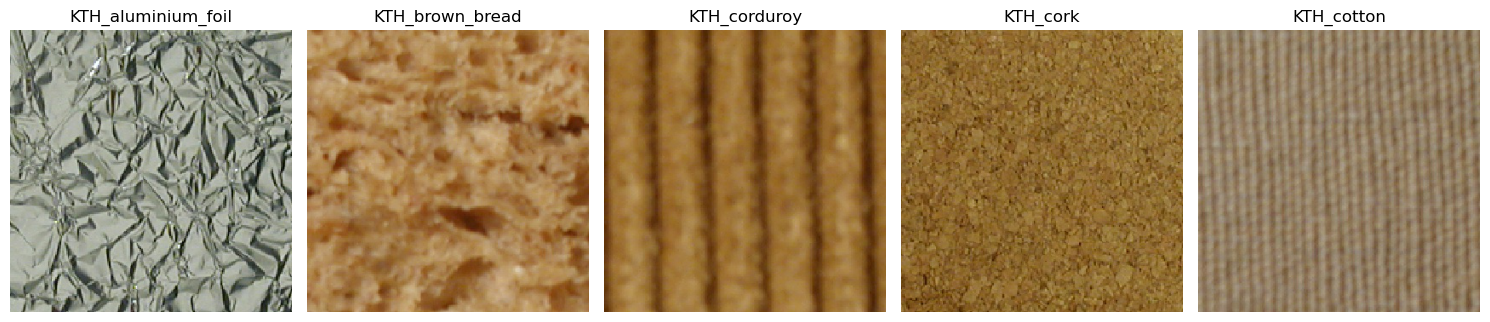

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the directory where the dataset is stored
dataset_directory = 'C:\\Users\\Aishwariya\\Downloads\\Splited\\train'

# Initialize a counter for the number of classes processed
num_classes = 0

# Initialize a figure for plotting
plt.figure(figsize=(15, 10))

# Display one image from each class in both vertical and horizontal orientations
for class_name in os.listdir(dataset_directory):
    class_dir = os.path.join(dataset_directory, class_name)
    
    # Check if it's a directory
    if os.path.isdir(class_dir):
        # Get the first image in the directory
        image_name = os.listdir(class_dir)[0]
        image_path = os.path.join(class_dir, image_name)
        
        # Load the image
        image = Image.open(image_path)

        # Increment the class counter
        num_classes += 1

        # Add a subplot for the original image
        plt.subplot(2, 5, num_classes)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')

        # Check if we have processed 5 classes
        if num_classes == 5:
            break

# Adjust subplot parameters for a nicer layout
plt.tight_layout()
plt.show()

In [2]:
!pip install tensorflow

In [3]:
!pip install keras




1/1 [==============================] - 0s 118ms/step


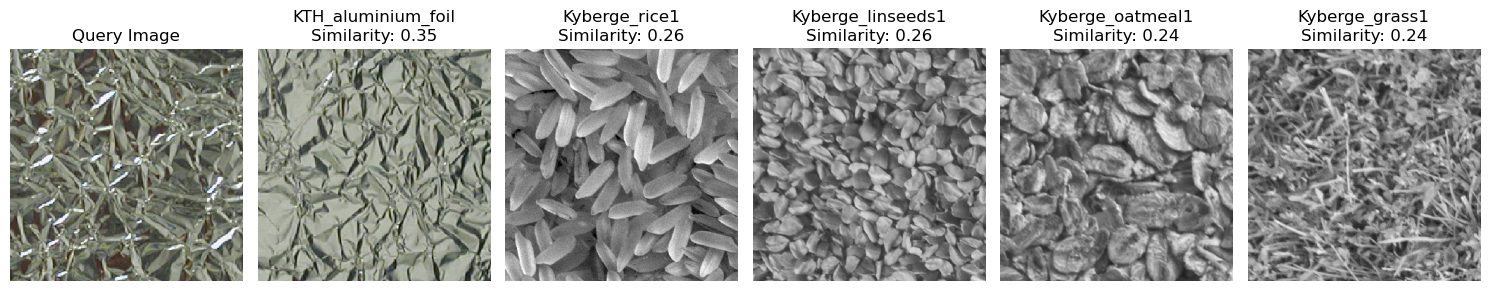

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity

# Set the path to the directory where the dataset is stored
dataset_directory = 'C:\\Users\\Aishwariya\\Downloads\\Splited\\train'
valid_directory = 'C:\\Users\\Aishwariya\\Downloads\\Splited\\valid'

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = base_model.predict(img_array)
    features = features.flatten()  # Flatten the feature representation
    return features

# Extract features from the images in the 'train' folder
train_features = {}
for class_name in os.listdir(dataset_directory):
    class_dir = os.path.join(dataset_directory, class_name)
    
    if os.path.isdir(class_dir):
        image_name = os.listdir(class_dir)[0]
        image_path = os.path.join(class_dir, image_name)
        
        train_features[class_name] = extract_features(image_path)

# Extract features from the images in the 'valid' folder
valid_features = {}
for class_name in os.listdir(valid_directory):
    class_dir = os.path.join(valid_directory, class_name)
    
    if os.path.isdir(class_dir):
        image_name = os.listdir(class_dir)[0]
        image_path = os.path.join(class_dir, image_name)
        
        valid_features[class_name] = extract_features(image_path)

# Function to find the most similar images using cosine similarity
def find_similar_images(query_features, dataset_features):
    similarities = {}
    for class_name, features in dataset_features.items():
        similarity = cosine_similarity([query_features], [features])[0][0]
        similarities[class_name] = similarity
    return similarities

# Choose a random image from the 'valid' folder for demonstration
query_class = np.random.choice(list(valid_features.keys()))
query_image_path = os.path.join(valid_directory, query_class, os.listdir(os.path.join(valid_directory, query_class))[0])
query_features = extract_features(query_image_path)

# Find similar images in the 'train' folder
similarities = find_similar_images(query_features, train_features)

# Sort the results by similarity
sorted_results = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

# Display the query image and the top similar images
plt.figure(figsize=(15, 5))
plt.subplot(1, 6, 1)
plt.imshow(Image.open(query_image_path))
plt.title('Query Image')
plt.axis('off')

for i in range(5):
    class_name, similarity = sorted_results[i]
    image_path = os.path.join(dataset_directory, class_name, os.listdir(os.path.join(dataset_directory, class_name))[0])
    plt.subplot(1, 6, i + 2)
    plt.imshow(Image.open(image_path))
    plt.title(f'{class_name}\nSimilarity: {similarity:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()